#California Housing Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


KeyboardInterrupt



In [ ]:
df = pd.read_excel("/Users/states/Desktop/BostonHousing/Boston_Housing.xlsx", engine="openpyxl")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#  Key Insights

1. **Crime & Environment:**  
   - Crime rates vary widely (**0.006 – 88.98**).  
   - Pollution levels (NOX) range from **0.38 to 0.87**.  

2. **Housing & Infrastructure:**  
   - **Rooms per house:** Avg **6.28**, max **8.78**.  
   - **Old buildings:** Avg **68.57%**, some areas **100%**.  
   - **Highway access:** Varies (**1 – 24**).  

3. **Economy & Education:**  
   - **Property tax:** Avg **408**, max **711**.  
   - **Pupil-teacher ratio:** Avg **18.46**, max **22**.  
   - **Low-income population:** Up to **37.97%**.  

4. **Housing Prices:**  
   - **Avg Price:** **$22.5K (scaled), capped  at      $50K**.  

### **Key Takeaway:**  
Strong disparities exist in crime, pollution, housing, education, and income levels.

In [ ]:
df.shape

(506, 14)

In [ ]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

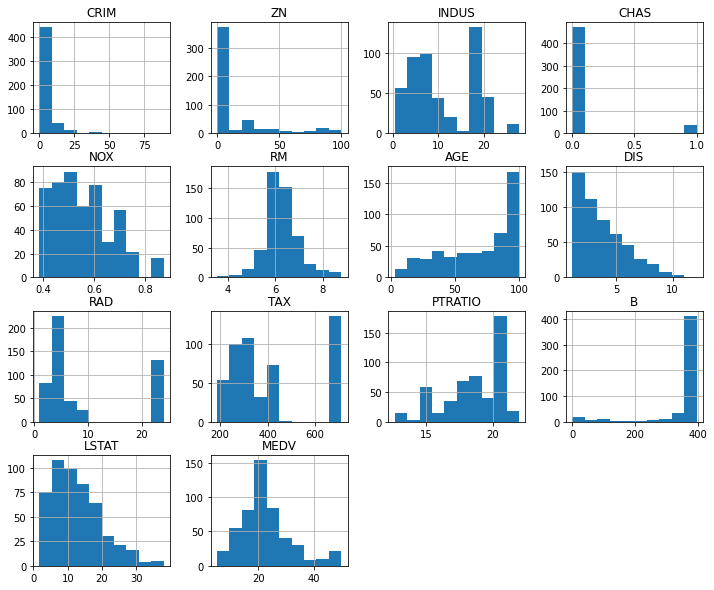

In [ ]:
# Plot histograms for all columns
df.hist(figsize=(12, 10))
plt.show()

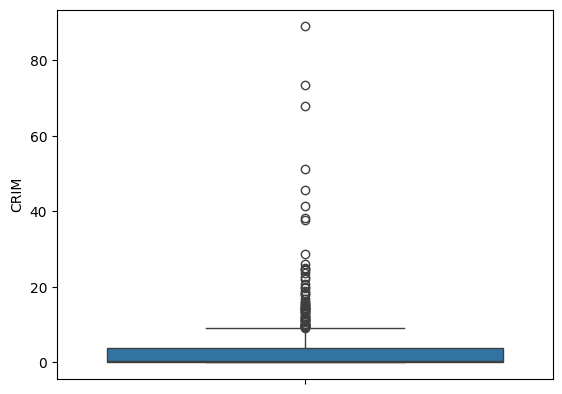

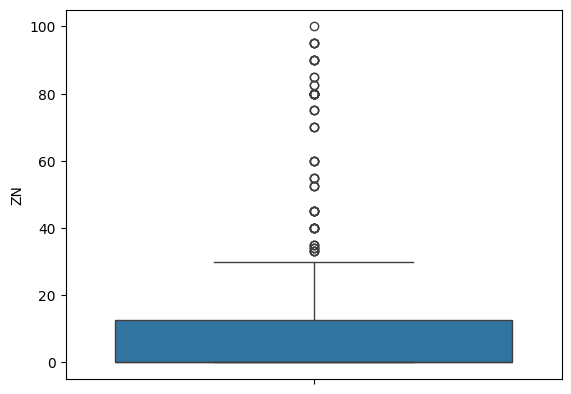

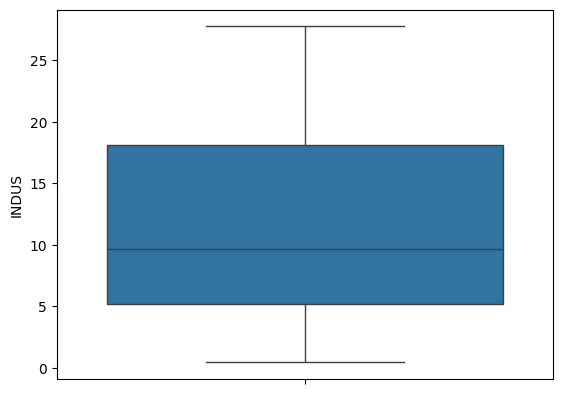

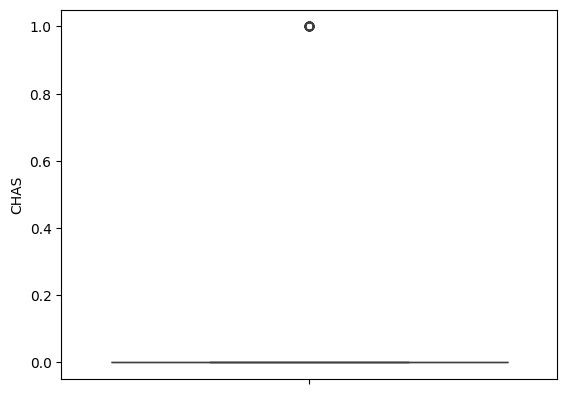

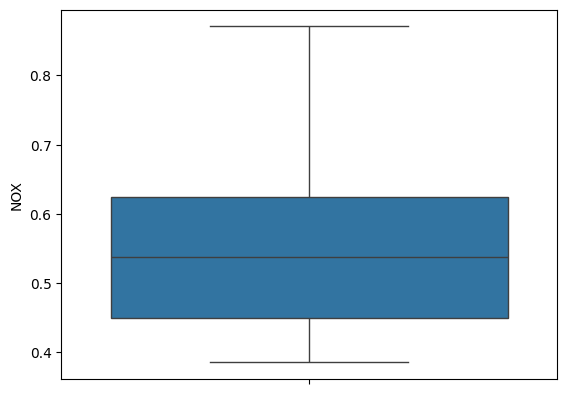

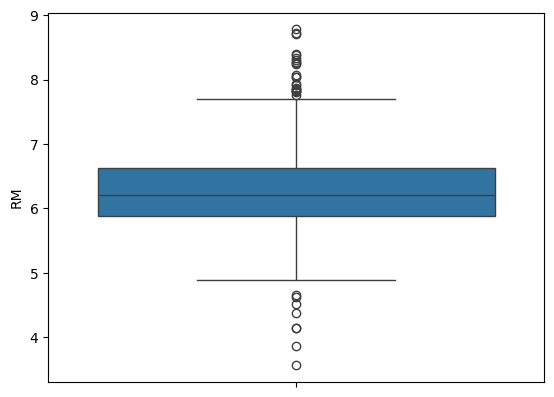

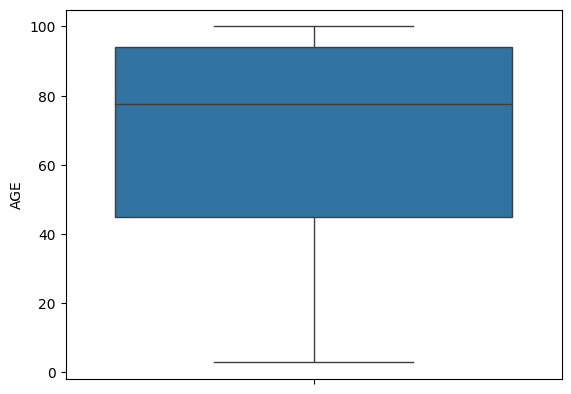

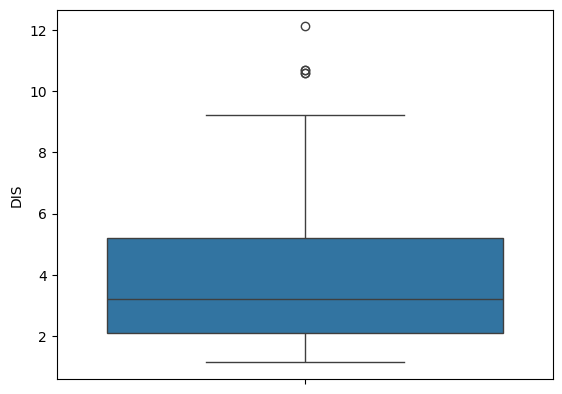

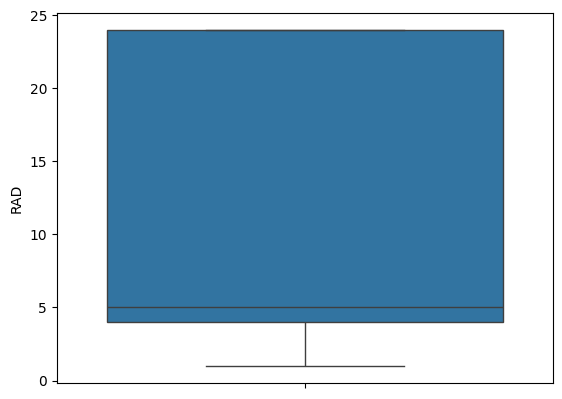

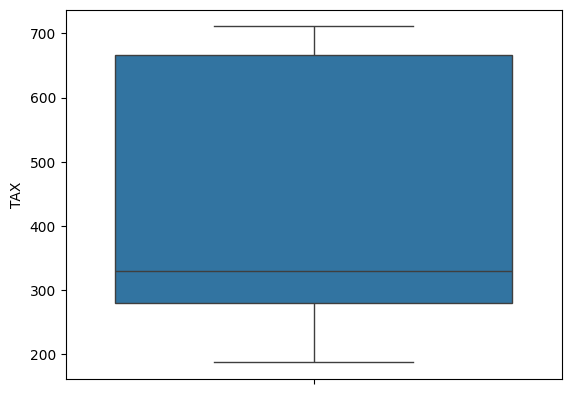

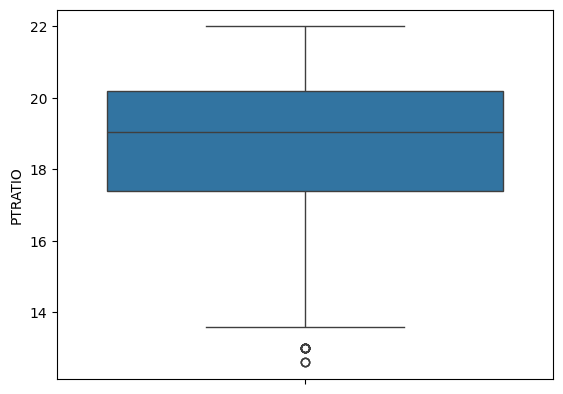

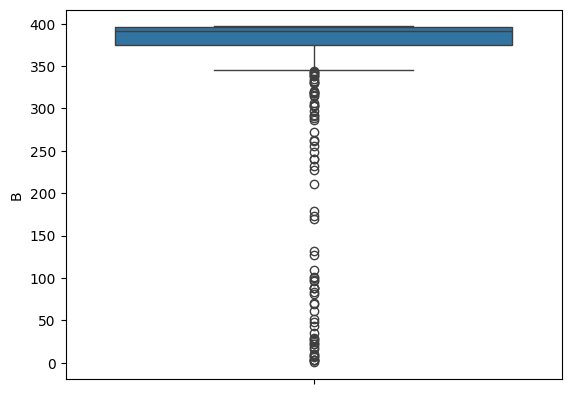

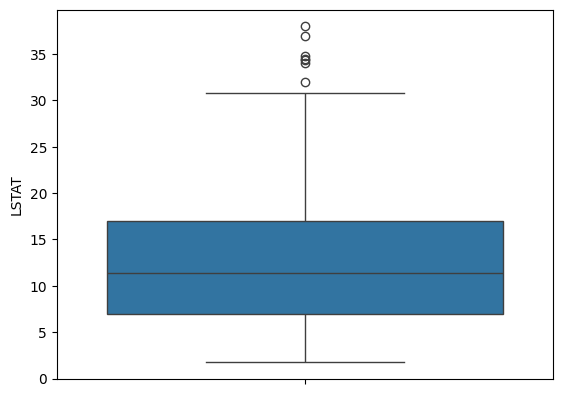

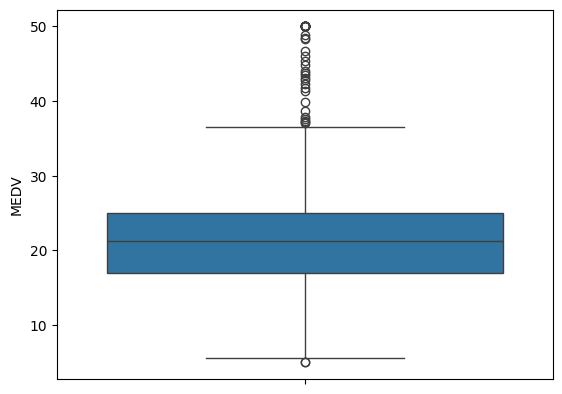

In [128]:
for i in df.columns:
  if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
    sns.boxplot(df[i])
    plt.show()

In [13]:
def cap_outliers(df, columns):
    for col in columns:
        if col == "MEDV":
            continue
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR

        df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
        df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

    return df


In [130]:
outlier_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                   'PTRATIO', 'B', 'LSTAT']  # Exclude MEDV

df = cap_outliers(df, outlier_columns)


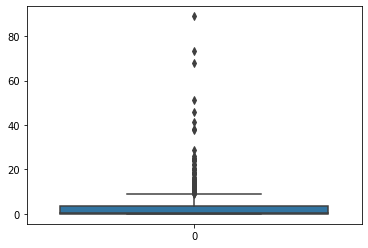

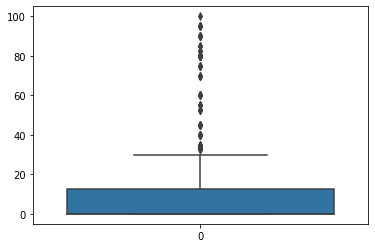

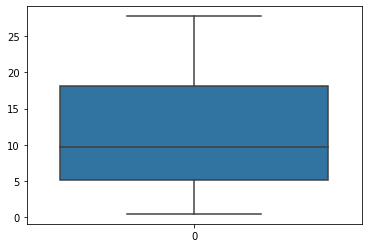

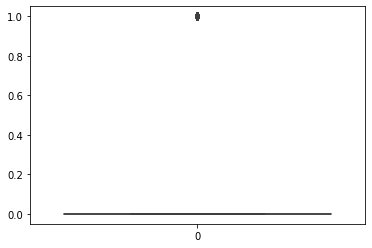

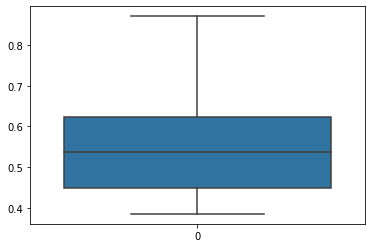

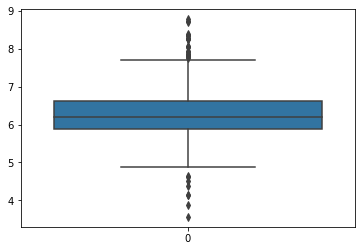

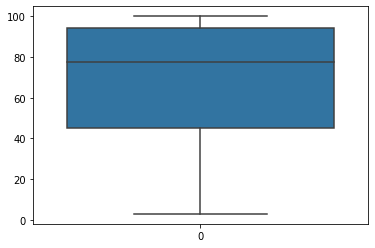

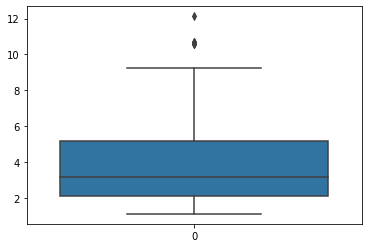

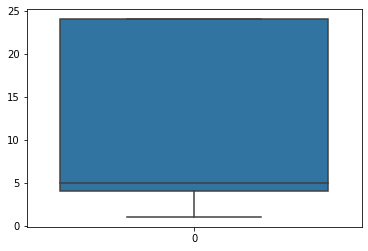

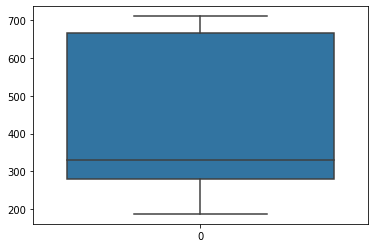

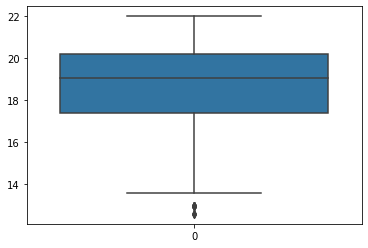

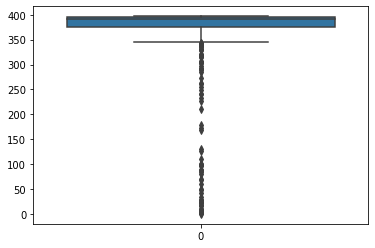

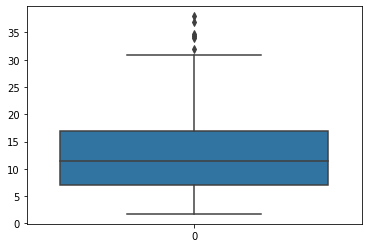

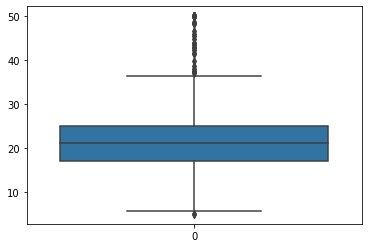

In [ ]:
for i in df.columns:
  if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
    sns.boxplot(df[i])
    plt.show()

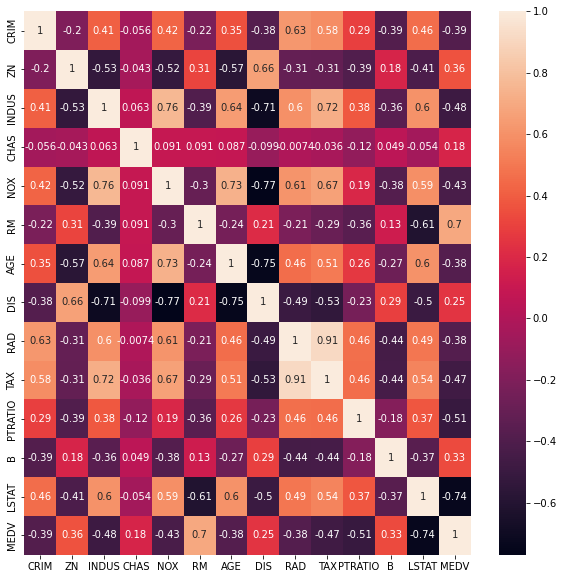

In [ ]:
#corr
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

# Correlation Summary

1. Strongest Relationships with Target (MEDV):
Positive:

RM (0.70): More rooms → Higher home prices.

ZN (0.37): More residential zoning → Slightly higher prices.

Negative:

LSTAT (-0.74): Higher poverty → Lower prices (strongest predictor).

PTRATIO (-0.51): More students per teacher → Lower prices.

CRIM (-0.45): Higher crime → Lower prices.

2. Multicollinearity (High Correlation Between Features):
RAD (access to highways) ↔ TAX (0.91): Likely redundant; tax rates rise with highway accessibility.

INDUS (industrial areas) ↔ NOX (pollution) (0.76): Industrial zones correlate with pollution.

DIS (distance to jobs) ↔ NOX (-0.78): Areas farther from jobs have less pollution.

3. Weak or Surprising Relationships:
CHAS (river proximity) ↔ MEDV (0.18): Weak impact on prices.

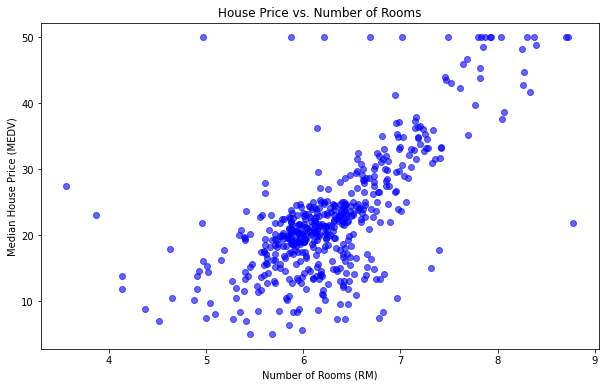

In [17]:
# Scatter plot between RM (Number of Rooms) and MEDV (House Price)
plt.figure(figsize=(10, 6))
plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.6)
plt.title('House Price vs. Number of Rooms')
plt.xlabel('Number of Rooms (RM)')
plt.ylabel('Median House Price (MEDV)')
plt.show()


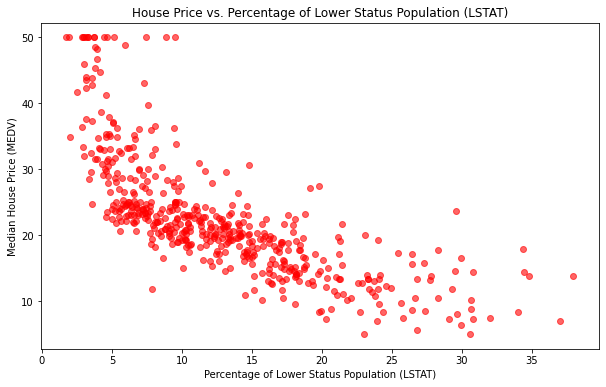

In [ ]:

# Scatter plot between LSTAT (Lower Status Population) and MEDV (House Price)
plt.figure(figsize=(10, 6))
plt.scatter(df['LSTAT'], df['MEDV'], color='red', alpha=0.6)
plt.title('House Price vs. Percentage of Lower Status Population (LSTAT)')
plt.xlabel('Percentage of Lower Status Population (LSTAT)')
plt.ylabel('Median House Price (MEDV)')
plt.show()


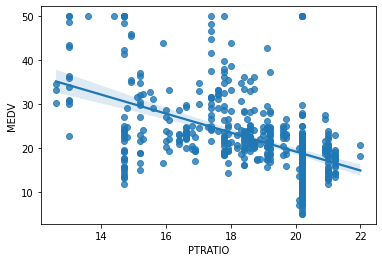

In [ ]:
sns.regplot(x='PTRATIO', y='MEDV', data=df)
plt.show()

In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [25]:
# Check multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

    Feature         VIF
0      CRIM    2.131404
1        ZN    2.910004
2     INDUS   14.485874
3      CHAS    1.176266
4       NOX   74.004269
5        RM  136.101743
6       AGE   21.398863
7       DIS   15.430455
8       RAD   15.369980
9       TAX   61.939713
10  PTRATIO   87.227233
11        B   21.351015
12    LSTAT   12.615188
13     MEDV   24.503206


In [138]:
df = df.drop(columns=["B", "PTRATIO", "NOX"])
df.head()

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,LSTAT,MEDV
0,0.00632,18.0,2.31,0,6.575,65.2,4.0900,1.0,296.0,4.98,24.0
1,0.02731,0.0,7.07,0,6.421,78.9,4.9671,2.0,242.0,9.14,21.6
2,0.02729,0.0,7.07,0,7.185,61.1,4.9671,2.0,242.0,4.03,34.7
3,0.03237,0.0,2.18,0,6.998,45.8,6.0622,3.0,222.0,2.94,33.4
4,0.06905,0.0,2.18,0,7.147,54.2,6.0622,3.0,222.0,5.33,36.2


As RM is an important factor we can't eliminate it so we will make another column with LSTAT

In [26]:
df['RM_LSTAT'] = df['RM'] / df['LSTAT']

In [27]:
print(df[['RM', 'LSTAT', 'RM_LSTAT']].head())

      RM  LSTAT  RM_LSTAT
0  6.575   4.98  1.320281
1  6.421   9.14  0.702516
2  7.185   4.03  1.782878
3  6.998   2.94  2.380272
4  7.147   5.33  1.340901


In [28]:
# Check multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
print(vif_data)

     Feature         VIF
0       CRIM    2.189747
1         ZN    2.977542
2      INDUS   14.602764
3       CHAS    1.177571
4        NOX   74.361043
5         RM  145.027899
6        AGE   21.641522
7        DIS   15.491677
8        RAD   15.396508
9        TAX   61.965382
10   PTRATIO   87.553947
11         B   21.493202
12     LSTAT   14.071092
13      MEDV   30.541236
14  RM_LSTAT   10.472554


In [29]:
#drop TAX
df.drop(columns=['TAX'], inplace=True)

#Model Building

##Linear Regression

In [30]:
X = df.drop(columns=["MEDV"])
y = df["MEDV"]                 # Target (house prices)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl', 'wb'))

In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [147]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test_scaled)
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.728
RMSE: 4.469


In [148]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

print(f"Training R²: {train_score:.3f}")
print(f"Testing R²: {test_score:.3f}")

Training R²: 0.767
Testing R²: 0.728


#Random Forest

In [149]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [150]:

print(X_train.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'LSTAT',
       'RM_LSTAT'],
      dtype='object')


In [151]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Train on unscaled data
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 2. Predict on unscaled test data
y_pred = model.predict(X_test)

# 3. Calculate metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R²: {r2:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.863
RMSE: 3.167


## Random Forest with Hyperparameter Tuning

In [152]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Hyperparameters to Test
We’ll test different values for two key parameters:

n_estimators: Number of trees in the forest.

max_depth: Maximum depth of each tree.

In [153]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],  # Test more trees
    'max_depth': [5, 10, 15, 20, None],    # Test deeper trees
    'min_samples_split': [2, 5, 10],       # Control overfitting
    'max_features': ['sqrt', 'log2']       # Features per split
}

In [154]:

rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV to test all combinations
grid_search = GridSearchCV(
    estimator=rf,           # Model to tune
    param_grid=param_grid,  # Hyperparameters to test
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Use R² to evaluate performance
    verbose=1,              # Show progress
    n_jobs=-1               # Use all CPU cores
)

In [155]:
# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'n_estimators': [50, 100, 200]},
             scoring='r2', verbose=1)

In [156]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'n_estimators': 100}


In [157]:
# Train the model with the best hyperparameters
tuned_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    random_state=42
)

tuned_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [158]:
# Predict on test data
y_pred_tuned = tuned_rf.predict(X_test)

# Calculate metrics
r2_tuned = r2_score(y_test, y_pred_tuned)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))

print("Tuned Random Forest:")
print(f"R²: {r2_tuned:.3f}")
print(f"RMSE: {rmse_tuned:.3f}")

Tuned Random Forest:
R²: 0.863
RMSE: 3.167


Same result of Random Forest

#  Improved Random Forest with Hyperparameter Tuning

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
# Define what to test (like a "menu" of options for the computer)
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 5, 10, 20],    # How deep trees can grow
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'max_features': ['sqrt', 'log2']   # Features considered per split
}

In [161]:
# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Set up the search (like a robot testing all menu options)
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,              # Test 20 random combinations (faster!)
    cv=5,                   # 5-fold cross-validation
    scoring='r2',           # Use R² to pick the best
    verbose=1,              # Show progress
    random_state=42,
    n_jobs=-1               # Use all CPU cores
)

In [162]:
# Train the model with different hyperparameters (this takes 1-2 mins)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='r2', verbose=1)

In [163]:
# Ask the computer: "What was the best combination?"
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'log2', 'max_depth': None}


In [164]:
# Use the best hyperparameters to train the final model
improved_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    max_features=best_params['max_features'],
    random_state=42
)

improved_rf.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', n_estimators=200, random_state=42)

In [165]:
# Predict on test data
y_pred_improved = improved_rf.predict(X_test)

# Calculate metrics
r2_improved = r2_score(y_test, y_pred_improved)
rmse_improved = np.sqrt(mean_squared_error(y_test, y_pred_improved))

print("Improved Random Forest:")
print(f"R²: {r2_improved:.3f}")
print(f"RMSE: {rmse_improved:.3f}")

Improved Random Forest:
R²: 0.843
RMSE: 3.389


In [166]:
print("\nOriginal Tuned Random Forest:")
print(f"R²: 0.863")   # Replace with your old R²
print(f"RMSE: 3.167")  # Replace with your old RMSE


Original Tuned Random Forest:
R²: 0.863
RMSE: 3.167


#Summary
Random Forest Outperforms Linear Regression and Tuned/ Improved  RF(Grid adn Random):

16% Higher Accuracy: Explains 86.3% of price variation vs. 72.8%.

29% Lower Error: Predictions are, on average, $1,300 closer to actual prices.

Original Random Forest (Best Performance):

R² = 0.863, RMSE = 3.167

Outperformed Linear Regression by ~14% accuracy and ~29% lower error.

Tuned Random Forest:

No improvement over the original model.

Likely because default hyperparameters were already optimal for this dataset.

Improved Random Forest (Worse Performance):

R² = 0.843, RMSE = 3.389

Hyperparameter tuning with RandomizedSearchCV slightly reduced performance.

Possible Reasons: Overfitting on training data or suboptimal hyperparameter ranges.